**Notebook to visualize the categorical trait model performance.**

- Figure 2: Model comparison across the Plants of the World Online and Wikipedia dataset. Precision and recall for the categorical traits are shown for the keyword search, logistic regression , DistilBERT and SciBERT.
- Figure S4: Inter-data set precision and recall scores using the DistilBERT model. Each row of the heatmap represents the dataset used in training, while each column represents the dataset used for testing.

# Libraries & Functions

In [2]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [3]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cmasher as cmr
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [4]:
trait_values_dict = {}

trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

In [5]:
focus_names = ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]
focus_codes = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]
df_names = ["POWO", "WIKI", "POWO_MGH"]

# Result Data

In [7]:
results_dict = {}

## Regex

In [8]:
df_results_regex1 = pd.read_excel("..//Data//Results//Regex_Simple_Results.xlsx") 
df_results_regex2 = pd.read_excel("..//Data//Results//Regex_Advanced_Results.xlsx") # Only the advanced regex is used

## Logistic Regression

In [9]:
df_results_lr = pd.read_excel("..//Data//Results//LR_Bow_Results.xlsx")

## DistilBERT

In [10]:
df_results_DistilBERT = pd.read_excel("..//Data//Results//DistilBERT_Results.xlsx")

## SciBERT

In [11]:
df_results_SciBERT = pd.read_excel("..//Data//Results//SciBERT_Results.xlsx")

## Group Results

In [12]:
df_results_full = pd.concat([df_results_regex2, df_results_lr, df_results_DistilBERT, df_results_SciBERT])

In [13]:
# Calculate average per database per model
average_rows = []
for dataset in ["POWO", "WIKI"]:
    for model in ["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]:
        metric_averages = []
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
            avg = 0
            for trait in ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]:
                df_subset = df_results_full[(df_results_full["Train Dataset"]==dataset)*
                                            (df_results_full["Test Dataset"]==dataset)*
                                            (df_results_full["Model"]==model)*
                                            (df_results_full["Trait Value"]==trait)]
                avg += df_subset[metric].values[0]/5
            metric_averages.append(avg)
        average_rows.append([dataset, dataset, "Average", "Average"] + metric_averages + [model, model])

In [14]:
df_results_full = pd.concat([df_results_full, pd.DataFrame(average_rows, columns = df_results_full.columns)])

In [15]:
df_results_full

,Train Dataset,Test Dataset,Trait,Trait Value,Accuracy,Precision,Recall,F1-Score,Model,Representation
0,POWO,POWO,Growth Form,herb,0.727383,0.945547,0.572706,0.713347,Regex,Regex
1,POWO,POWO,Growth Form,shrub,0.864647,0.588392,0.765926,0.665522,Regex,Regex
2,POWO,POWO,Growth Form,tree,0.931412,0.938053,0.754025,0.836032,Regex,Regex
3,POWO,POWO,Growth Form,Growth Form,0.841147,0.823997,0.697552,0.738300,Regex,Regex
4,WIKI,WIKI,Growth Form,herb,0.678115,0.950318,0.366645,0.529141,Regex,Regex
...,...,...,...,...,...,...,...,...,...,...
3,POWO,POWO,Average,Average,0.943424,0.908036,0.888371,0.897341,SciBERT_PreTrained,SciBERT_PreTrained
4,WIKI,WIKI,Average,Average,0.645486,0.782594,0.247051,0.309445,Regex,Regex
5,WIKI,WIKI,Average,Average,0.904644,0.830781,0.779760,0.798762,Logistic Regression,Logistic Regression
6,WIKI,WIKI,Average,Average,0.948506,0.910076,0.886910,0.897131,DistilBERT_PreTrained,DistilBERT_PreTrained


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_207960\3335028401.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


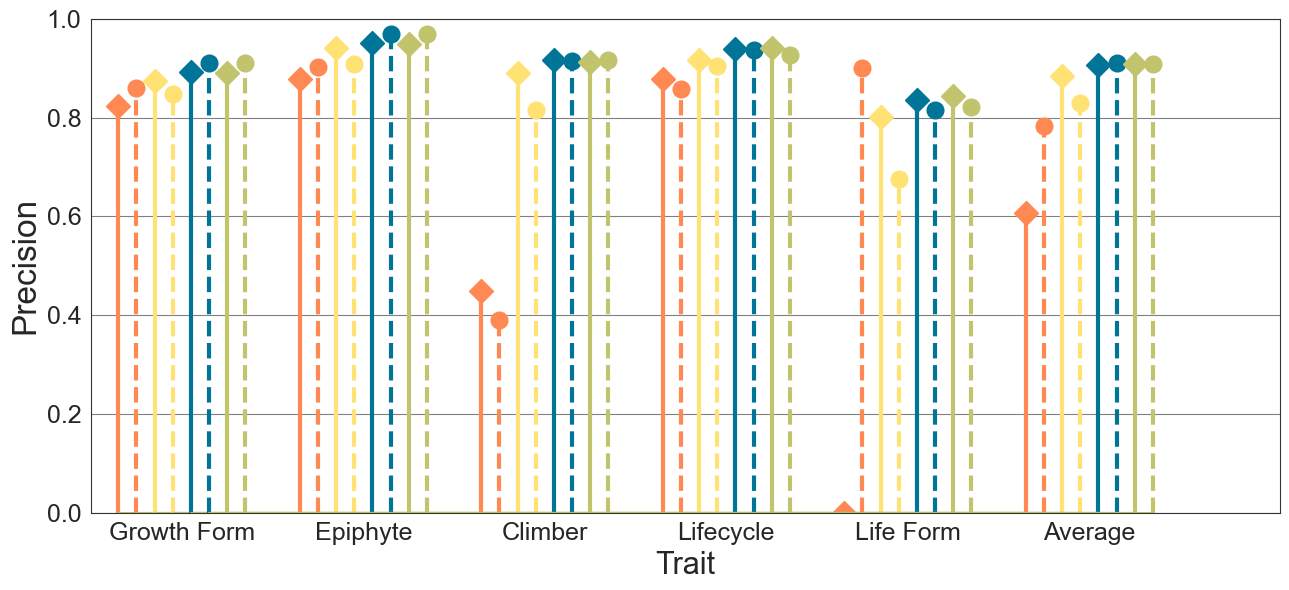

C:\Users\Admin\AppData\Local\Temp\ipykernel_207960\3335028401.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


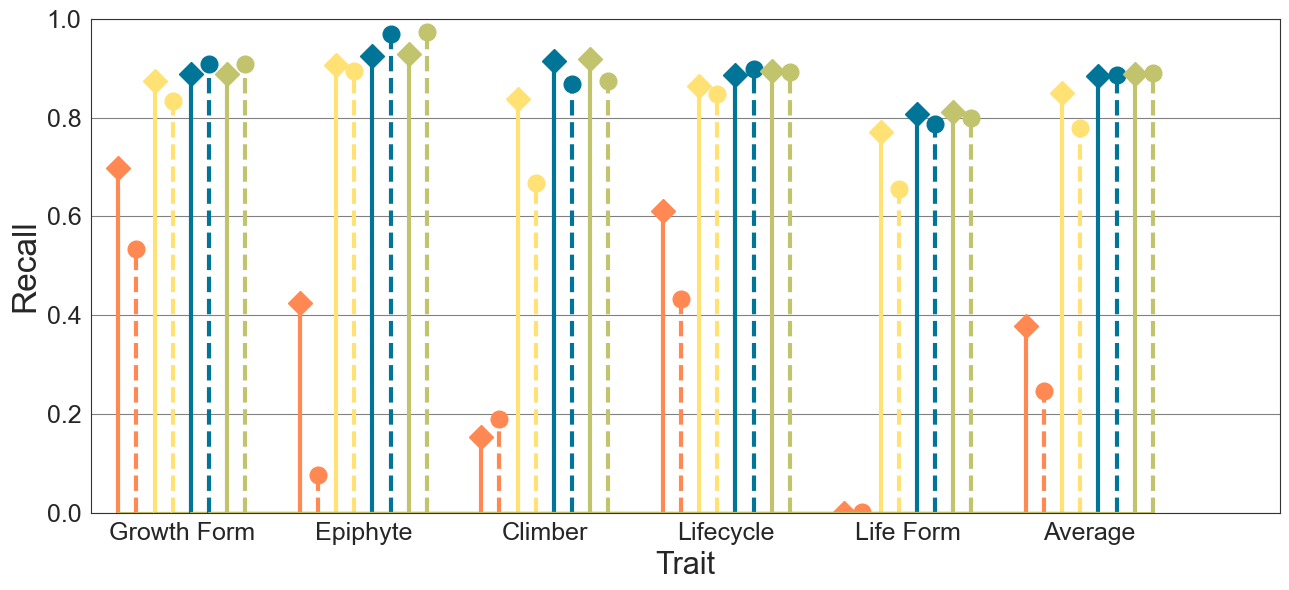

In [25]:
for i, metric in enumerate(["Precision", "Recall"]):

    fig, axes  = plt.subplots(figsize=(13,6), nrows = 1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]):
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names + ["Average"])]
            if(dataset=="POWO"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="WIKI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(3.5, 60, 10))
    axes.set_xticklabels(["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    plt.xlim(-1.5, 64)
    # plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27880\3302523248.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


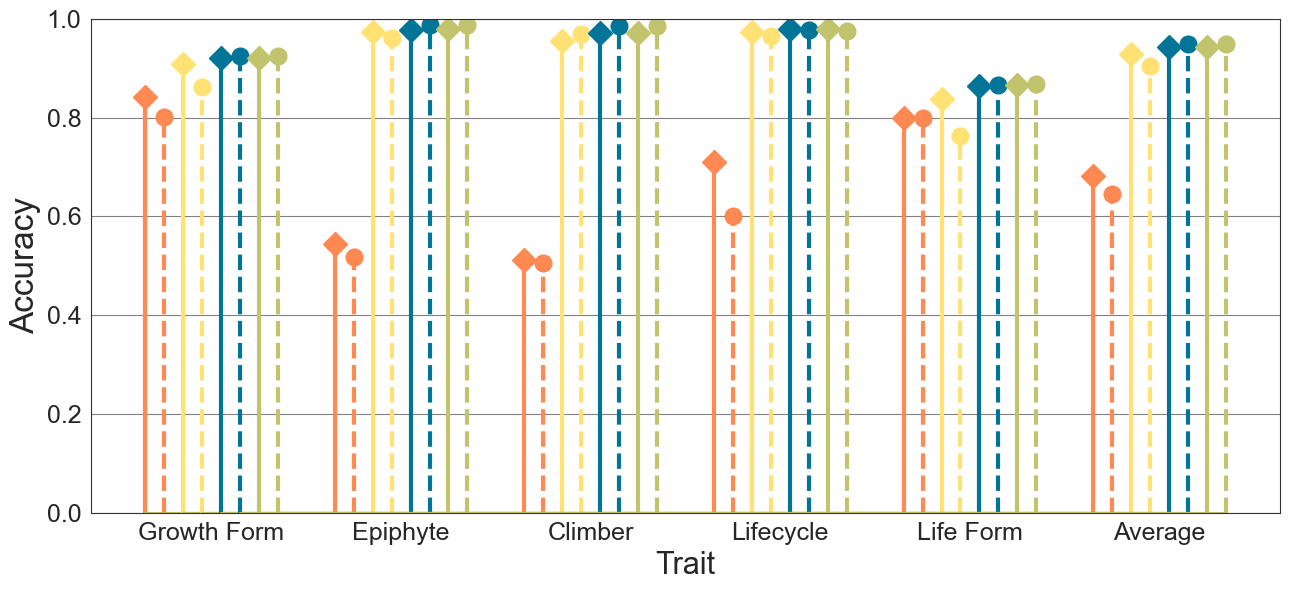

C:\Users\Admin\AppData\Local\Temp\ipykernel_27880\3302523248.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


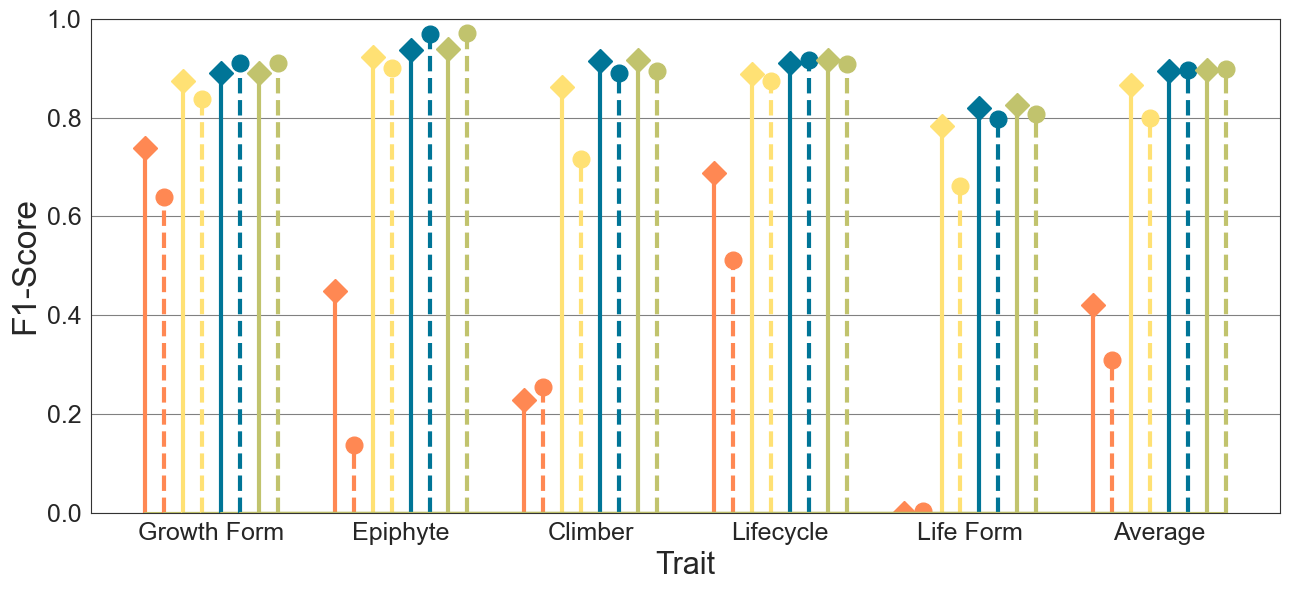

In [17]:
for i, metric in enumerate(["Accuracy", "F1-Score"]):
    fig, axes  = plt.subplots(figsize=(13,6), nrows = 1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]):
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names + ["Average"])]
            if(dataset=="POWO"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="WIKI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(3.5, 60, 10))
    axes.set_xticklabels(["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Cross Dataset Evaluation

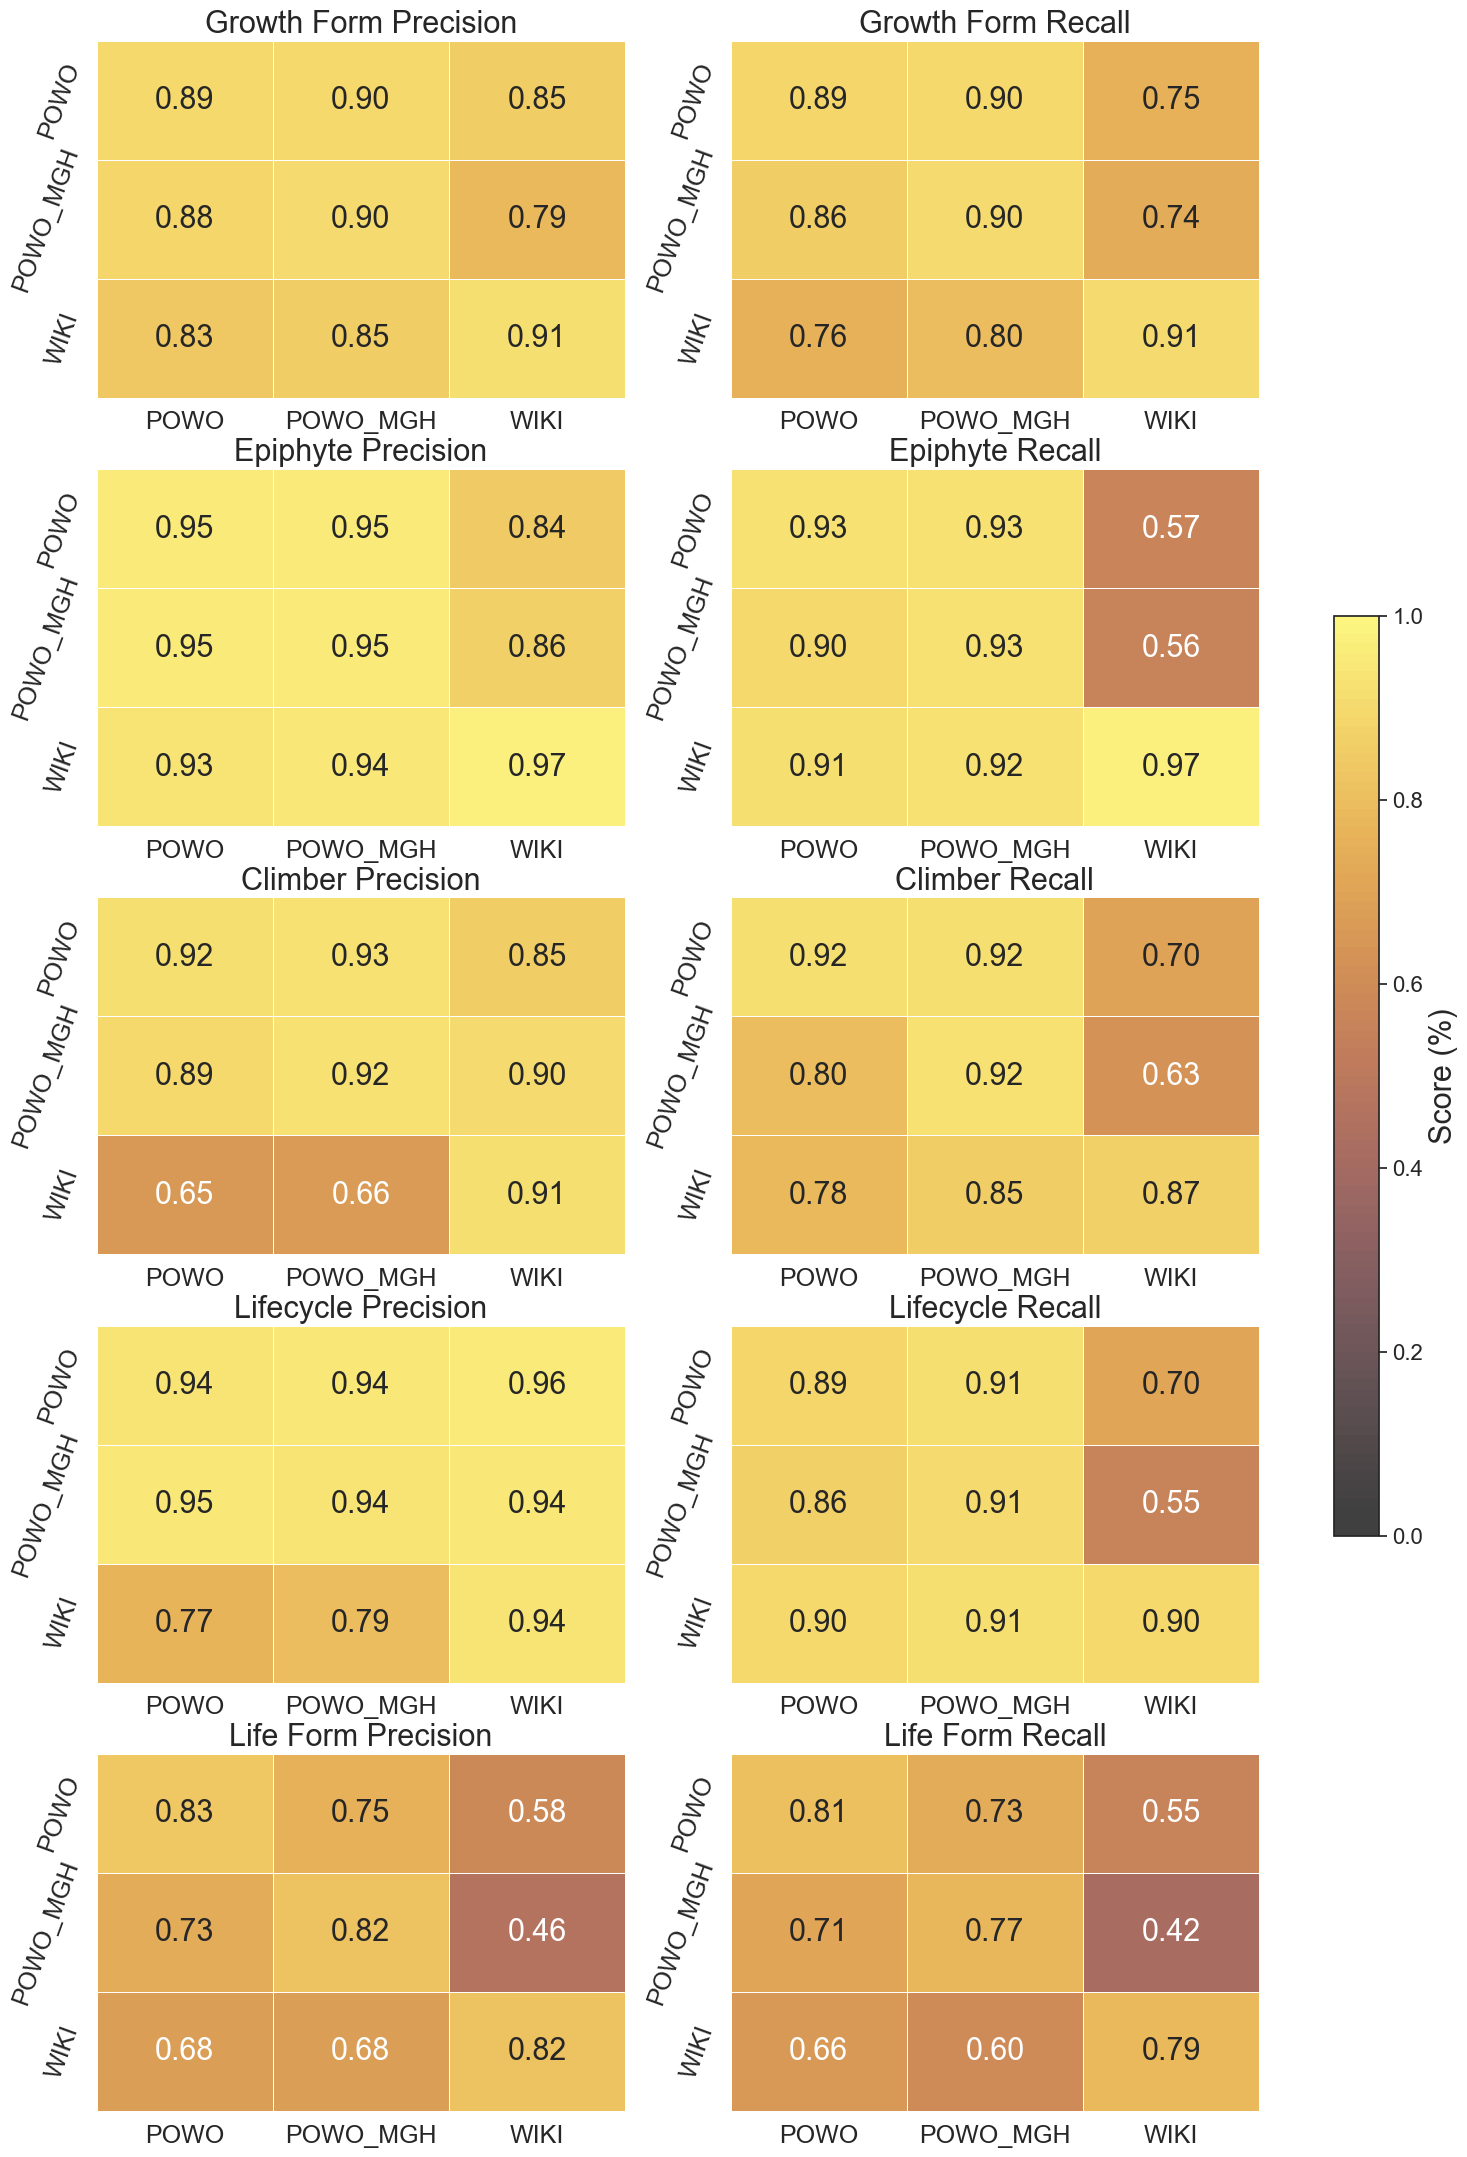

In [23]:
df_subset = df_results_full[(df_results_full["Model"]=="DistilBERT_PreTrained")*df_results_full["Trait Value"].apply(lambda x: x in focus_names)]
sns.set_theme(style="white", palette=None)

cmap = cmr.amber
cmap = cmr.amber

c = 0.25
n = 100
cmap = ListedColormap((1. - c) * cmap(np.linspace(0., 1., n)) + c * np.ones((n, 4)))
# cmap = test_color_map_cmp
# cmap = "viridis"
# cmap = double#matplotlib.colors.LinearSegmentedColormap.from_list("", color_palette[2:3] + color_palette[1:2])

plt.subplots(figsize=(15,23), nrows = 5, ncols = 2)
metric1 = "Precision"
metric2 = "Recall"
# plt.suptitle("Interdataset Evaluation - DistilBERT", fontsize = 30)
for i, focus_name in enumerate(focus_names[:]):
    plt.subplot(5, 2, 2*i+1)
    df_matrix = df_subset[(df_subset["Trait"]==focus_name)][["Train Dataset", "Test Dataset", metric1]].set_index(["Train Dataset", "Test Dataset"]).unstack(fill_value=0)
    im1 = sns.heatmap(df_matrix, vmin=0, vmax = 1, annot = True, fmt = '.2f', annot_kws = {"fontsize":22}, cmap=cmap, cbar=False, linewidths=.5)
    plt.xticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=0, size=18)
    plt.yticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=70, size=18)
    plt.title(focus_name + " " + metric1, fontsize = 22)
    plt.xlabel("", fontsize = 16)
    plt.ylabel("", fontsize = 16)

    plt.subplot(5, 2, 2*i+2)
    df_matrix = df_subset[(df_subset["Trait"]==focus_name)][["Train Dataset", "Test Dataset", metric2]].set_index(["Train Dataset", "Test Dataset"]).unstack(fill_value=0)
    im1 = sns.heatmap(df_matrix, vmin=0, vmax = 1, annot = True, fmt = '.2f', annot_kws = {"fontsize":22}, cmap=cmap, cbar=False, linewidths=.5)
    plt.xticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=0, size=18)
    plt.yticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=70, size=18)
    plt.title(focus_name + " " + metric2, fontsize = 22)
    plt.xlabel("", fontsize = 16)
    plt.ylabel("", fontsize = 16)
    
plt.subplots_adjust(bottom=0.05, right=0.90, top=0.95)
cax = plt.axes([0.95, 0.3, 0.03, 0.4])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
sm.set_array([])

cbar = plt.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Score (%)", size=22)
# plt.show()
# plt.savefig("Figures/InterDatasetResults_v2.png", dpi=600, bbox_inches='tight')